In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Exploración y Limpieza

In [2]:
df_cfa = pd.read_csv("Customer Flight Activity.csv")
df_cfa.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_cfa.shape

(405624, 10)

In [4]:
df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
df_cfa.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [6]:
df_cfa.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [7]:
df_cfa.isna().sum()/df_cfa.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [8]:
df_cfa.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [9]:
df_cfa.duplicated().sum()

np.int64(1864)

In [10]:
df_cfa[df_cfa["Loyalty Number"].duplicated()].sort_values("Loyalty Number").head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
287317,100018,2018,6,0,0,0,0,0.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
257159,100018,2018,3,7,0,7,1876,280.5,0,0
257382,100018,2018,2,6,0,6,1824,273.0,0,0
142774,100018,2017,8,10,5,15,4200,420.0,690,56


In [11]:
df_cfa[df_cfa.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
304217,999986,2018,6,0,0,0,0,0.0,0,0
321118,999986,2018,7,15,0,15,1995,199.0,0,0
354920,999986,2018,9,0,0,0,0,0.0,0,0
185910,999986,2017,11,0,0,0,0,0.0,0,0


In [12]:
df_cfa.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [13]:
df_clh = pd.read_csv("Customer Loyalty History.csv")
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [14]:
df_clh.dtypes

Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [15]:
df_clh.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [16]:
df_clh.shape

(16737, 16)

In [17]:
df_clh.isna().sum()/df_clh.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [18]:
df_clh.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [19]:
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [20]:
df_clh.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [21]:
df_clh.describe(include=object).T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [22]:
df_clh.duplicated().sum()

np.int64(0)

In [23]:
df_merged = df_cfa.merge(df_clh, on="Loyalty Number", how="left")
df_merged.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [24]:
df_merged.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [25]:
df_merged.isna().sum()/df_merged.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [26]:
print(df_merged["Cancellation Year"].unique())


[  nan 2018. 2015. 2016. 2014. 2013. 2017.]


In [27]:
df_merged.drop(columns=["Cancellation Year", "Cancellation Month"], inplace=True)


In [28]:
df_merged.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3


In [29]:
df_merged.sample(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
305344,161180,2018,7,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,51157.0,Married,Star,9051.91,Standard,2012,8
306293,210416,2018,7,13,0,13,1482,148.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Nova,3402.39,Standard,2013,6
352754,883055,2018,9,4,0,4,3076,307.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,86947.0,Single,Aurora,7173.91,Standard,2014,5
397239,554155,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76706.0,Single,Nova,10388.55,Standard,2017,8
78497,679607,2017,5,6,2,8,1264,126.0,0,0,Canada,Ontario,Toronto,P1W 1K4,Male,High School or Below,55043.0,Married,Star,2722.21,Standard,2014,7
196591,668235,2017,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,90085.0,Divorced,Star,10626.81,2018 Promotion,2018,4
112510,690776,2017,7,8,0,8,1624,162.0,0,0,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Married,Nova,6948.42,Standard,2015,5
272642,218277,2018,5,11,7,18,2394,239.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,High School or Below,71344.0,Divorced,Nova,3449.49,Standard,2016,5
90909,442103,2017,6,17,4,21,2226,222.0,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,67819.0,Single,Star,22332.44,Standard,2013,1
61109,653259,2017,4,10,4,14,3752,375.0,0,0,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,82427.0,Married,Nova,4327.10,Standard,2016,2


In [30]:
df_merged.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
dtype: object

In [31]:
print(df_merged["Points Accumulated"].unique())

[152.   203.   120.   ...  18.75 601.   626.  ]


In [32]:
df_merged[["Loyalty Number", "Month", "Flights Booked", "Year"]].value_counts()



Loyalty Number  Month  Flights Booked  Year
678205          2      0               2017    3
                                       2018    3
                10     0               2017    3
                8      0               2017    3
                11     0               2017    3
                                              ..
402251          4      0               2017    1
                3      0               2018    1
                                       2017    1
                2      1               2018    1
999986          12     0               2018    1
Name: count, Length: 403676, dtype: int64

In [33]:
df_merged["Year"].unique()


array([2017, 2018])

In [34]:
reservas_por_mes = df_merged.groupby(["Year", "Month"])["Flights Booked"].sum()
reservas_por_mes

Year  Month
2017  1         47766
      2         47691
      3         64271
      4         55720
      5         65279
      6         80493
      7         89288
      8         78692
      9         63304
      10        60351
      11        56905
      12        77650
2018  1         49170
      2         48643
      3         66928
      4         56791
      5         76891
      6         92749
      7        104143
      8         90512
      9         73075
      10        69110
      11        65345
      12        88397
Name: Flights Booked, dtype: int64

In [35]:
df_merged["Year"] = pd.to_datetime(df_merged["Year"])


In [36]:
df_merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,1970-01-01 00:00:00.000002017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,1970-01-01 00:00:00.000002017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3
2,100140,1970-01-01 00:00:00.000002017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7
3,100214,1970-01-01 00:00:00.000002017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,1970-01-01 00:00:00.000002017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1


In [37]:
df_merged["Year"] = df_merged["Year"].dt.year  # Extraer solo el año


In [38]:
df_merged.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
405619,999902,1970,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5
405620,999911,1970,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8
405621,999940,1970,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7
405622,999982,1970,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7
405623,999986,1970,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2


### 1. Distribucion de la cantidad de vuelos reservados por mes durante el año

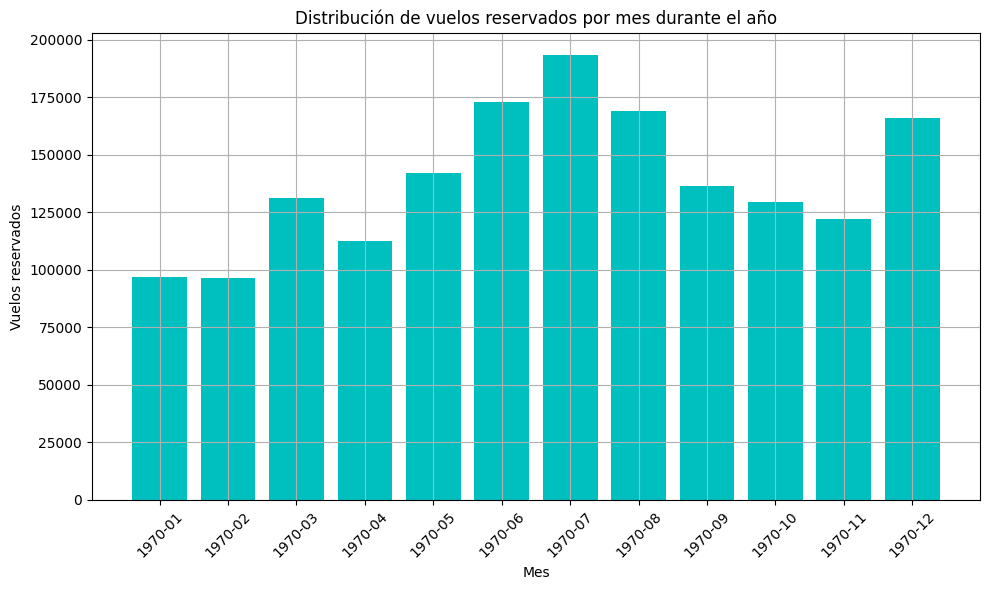

In [39]:
reservas_por_mes = df_merged.groupby(["Year", "Month"])["Flights Booked"].sum()

# Creamos una columna de 'Año-Mes' para el gráfico
reservas_por_mes = reservas_por_mes.reset_index()
reservas_por_mes["Año-Mes"] = reservas_por_mes["Year"].astype(str) + '-' + reservas_por_mes["Month"].astype(str).str.zfill(2)

# Graficamos el diagrama de barras
plt.figure(figsize=(10, 6))
plt.bar(reservas_por_mes["Año-Mes"], reservas_por_mes["Flights Booked"], color='c')
plt.title("Distribución de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df_merged.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

### 2. Existe una relación entre la distancia de los vuelos y los puntos acumula dos por los cliente?

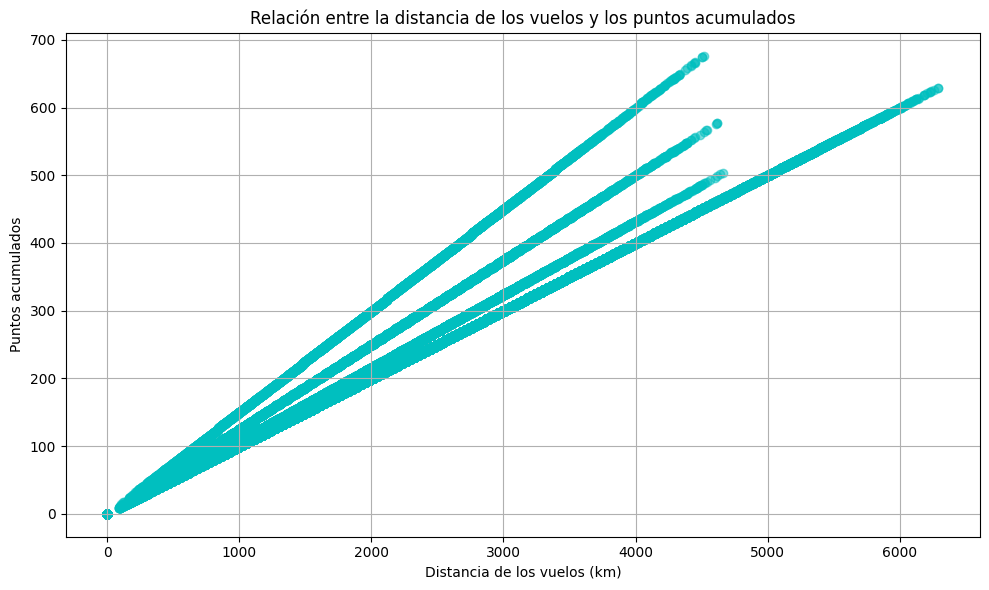

In [45]:
# Crear un gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df_merged["Distance"], df_merged["Points Accumulated"], color='c', alpha=0.5)
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia de los vuelos (km)")
plt.ylabel("Puntos acumulados")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Cálculo del coeficiente de correlación de Pearson
correlacion = df_merged["Distance"].corr(df_merged["Points Accumulated"])

# Mostrar el resultado
print(f"Coeficiente de correlación entre distancia y puntos acumulados: {correlacion}")


Coeficiente de correlación entre distancia y puntos acumulados: 0.9945637211531334


Una relación directa fuerte. A medida que aumenta la distancia, los puntos acumulados también lo hacen.

### 3. Cuál es la distribución de los clientes por provincia o estado?

In [51]:
# Agrupar por 'Province' y contar el número único de 'Loyalty Number' (clientes)
distribucion_provincia = df_merged.groupby("Province")["Loyalty Number"].nunique()
distribucion_provincia


Province
Alberta                  969
British Columbia        4409
Manitoba                 658
New Brunswick            636
Newfoundland             258
Nova Scotia              518
Ontario                 5404
Prince Edward Island      66
Quebec                  3300
Saskatchewan             409
Yukon                    110
Name: Loyalty Number, dtype: int64

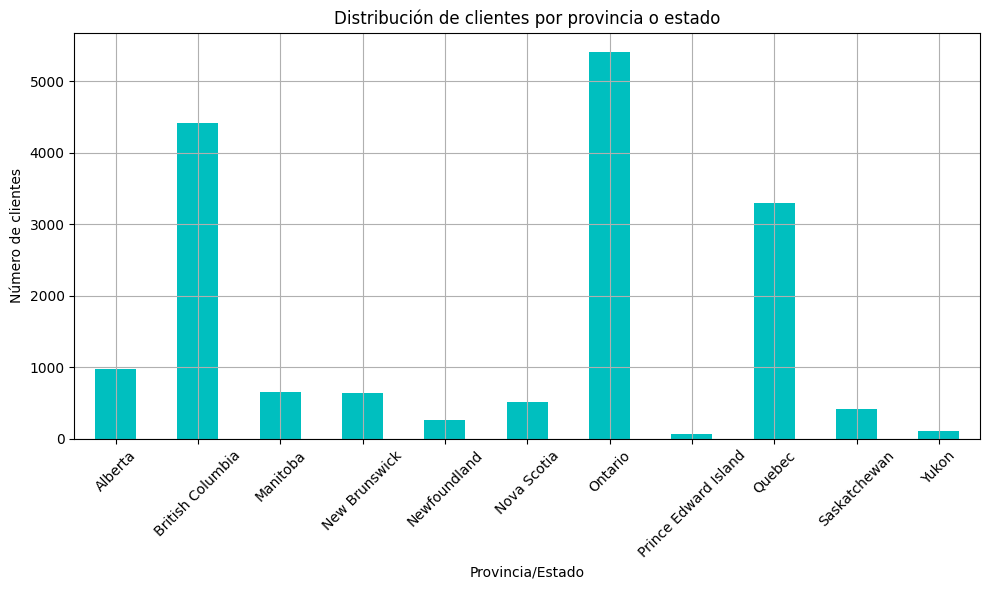

In [ ]:
# Crear un gráfico de barras para visualizar la distribución de clientes por provincia
plt.figure(figsize=(10, 6))
distribucion_provincia.plot(kind='bar', color='c')
plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia/Estado")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
